# Description (from the given problem statement)

## Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

## Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

## Data Dictionary

`Sl_No`: Primary key of the records

`Customer Key`: Customer identification number

`Average Credit Limit`: Average credit limit of each customer for all credit cards

`Total credit cards`: Total number of credit cards possessed by the customer

`Total visits bank`: Total number of visits that customer made (yearly) personally to the bank

`Total visits online`: Total number of visits or online logins made by the customer (yearly)

`Total calls made`: Total number of calls made by the customer to the bank or its customer service department (yearly)
 
## Best Practices for Notebook
The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and NOT as a notebook file (.ipynb).

## Submission Guidelines
The submission should be a well commented Jupyter notebook. [format - .html]
Any assignment found copied/plagiarized with other groups will not be graded and awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation.
Submission will not be evaluated if
it is submitted post-deadline, or,
more than 1 file is submitted.
 

Happy Learning!

## Scoring guide (Rubric) - AllLife Bank Customer Segmentation
### Define the problem and perform an Exploratory Data Analysis
Problem definition, questions to be answered - Data background and contents - Univariate analysis - Bivariate analysis - Insights based on EDA

6 points

### Data preprocessing
Prepare the data for analysis - Feature engineering - Missing value treatment - Outlier treatment - Duplicate observations check

4 points

### Applying K-means Clustering
Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out appropriate number of clusters - Cluster Profiling

10 points

### Applying Hierarchical Clustering
Apply Hierarchical clustering with different linkage methods - Plot dendrograms for each linkage method - Check cophenetic correlation for each linkage method - Figure out appropriate number of clusters - Cluster Profiling

10 points

### K-means vs Hierarchical Clustering
Compare clusters obtained from K-means and Hierarchical clustering techniques

2 points

### Actionable Insights & Recommendations
Conclude with the key takeaways for the business - What would be your recommendations to the business?

4 points

### Notebook - Overall Quality
Structure and flow - Well commented code

4 points

## Points Total 40

# 1. Loading Libraries and Importing Data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [2]:
# Standard import of a Comma Separated Values file
CCCD = pd.read_excel("Credit+Card+Customer+Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
# Making a copy to avoid corrupting the original data set
data = CCCD.copy()

<IPython.core.display.Javascript object>

# 2. Data Overview and Initial Observations

In [4]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 660 rows and 7 columns.


<IPython.core.display.Javascript object>

In [5]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [6]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [7]:
# I personally always like to look at a random sample.
data.sample(25, random_state=2)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
276,277,36340,15000,4,5,2,0
315,316,45673,19000,4,3,1,3
198,199,15546,19000,1,1,4,7
268,269,97109,17000,6,5,0,0
203,204,56624,9000,2,0,3,7
340,341,69028,7000,6,3,1,1
183,184,86410,16000,1,2,5,8
239,240,14263,16000,5,2,0,0
612,613,94391,157000,9,1,14,1
37,38,74126,17000,2,0,4,6


<IPython.core.display.Javascript object>

In [8]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

#### * There are no null values and all data types are integers.

In [9]:
# Checking for duplicated rows.
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### * There are no duplicated entries.

In [10]:
# Verifying that there are no missing values
data.isnull().sum().sort_values(ascending=False)

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

#### * Verification there are no NaN values.

In [11]:
# Checking the number of unique data points in each column
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

#### * I was expecting to see the `Sl_No` and `Customer Key` columns to both show 660. The fact that there are 655 shows that I have to verify where the `Customer Key` information is duplicated and figure out how to deal with that.

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


<IPython.core.display.Javascript object>

#### * Avg_Credit_Limit ranges from 3000-200000. The mean credit limit is 34574, but the 50th percentile is 18000 showing some heavy skewing by ther larger numbers.

#### * Total_Credit_Cards ranges from 1-10 with a mean of 4.7 and a median of 5.0. This shows some skew toward the lower numbers. 

#### * Total_visits_bank ranges from 0-5 with a mean of 2.4 and a median of 2. This seems reasonable.

#### * Total_visits_online ranges from 0-15 with a mean of 2.6 and a median of 2 showing that there are outliers on the high end.

#### * Total_calls_made ranges from 0-20 with a mean a 3.6 and a median of 3.0 showing that there are outliers on the high end.

# 3. Data Preprocessing

In [13]:
# dropping the serial no. column as it does not add any useful information
data.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
# Looking for duplicate customer keys.
CustKey = ["Customer Key"]

for column in CustKey:
    print(data[column].value_counts())
    print("-" * 100)

50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer Key, Length: 655, dtype: int64
----------------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

#### * There are duplicates for customers 50706, 37252, 97935, 96929, and 47437

In [15]:
data[data.values == 50706]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2


<IPython.core.display.Javascript object>

In [16]:
data[data.values == 37252]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2


<IPython.core.display.Javascript object>

In [17]:
data[data.values == 97935]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

In [18]:
data[data.values == 96929]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2


<IPython.core.display.Javascript object>

In [19]:
data[data.values == 47437]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0


<IPython.core.display.Javascript object>

#### * My original plan was to drop the `Customer Key`, with the duplicated numbers in the column I did some more analysis and found the rest of the data in the rows with duplicate values in the `Customer Key` column is vastly different. With that in mind if I drop the `Customer Key` then the data will not be duplicated. In a real world situation I would try to verify if this were a data entry error or some other issue with the data, perhaps customers with different accounts.

In [20]:
# dropping the Customer Key column as it does not add any useful information at the moment,
# but making it a new variable so I can pull the information back later.
subset = data.copy()
subset.drop("Customer Key", axis=1, inplace=True)

<IPython.core.display.Javascript object>

# 4. EDA

## Univariate 

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

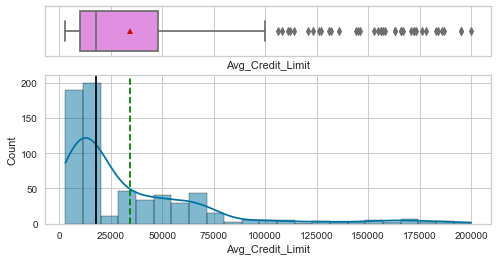

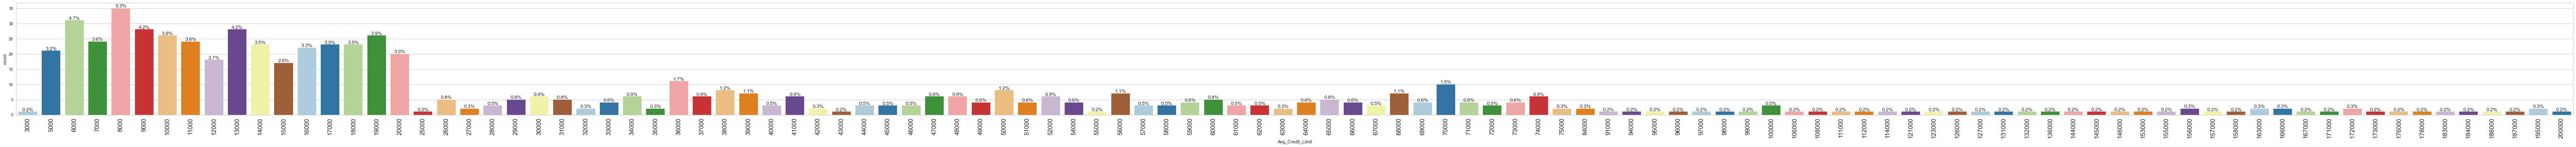

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(subset, "Avg_Credit_Limit", kde=True, figsize=(8, 4))
labeled_barplot(subset, "Avg_Credit_Limit", perc=True)

#### * The main section of data cuts off around 100000, with all the values up to 200000 being outliers. This will likely effect the K-means Clustering technique as it is sensitive to outliers. 

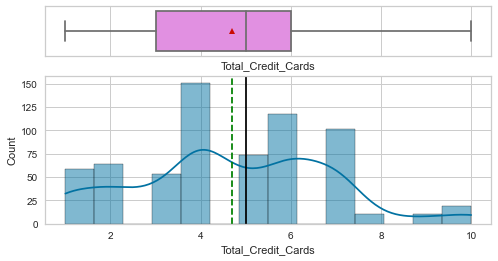

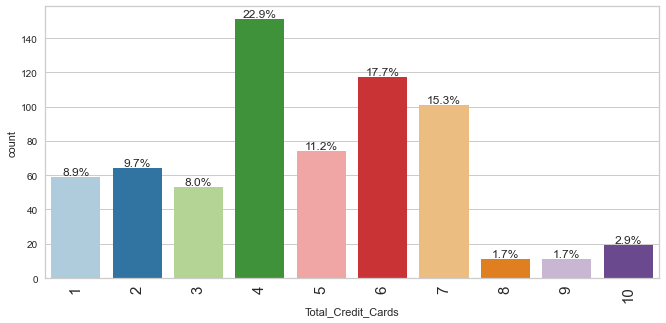

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(subset, "Total_Credit_Cards", kde=True, figsize=(8, 4))
labeled_barplot(subset, "Total_Credit_Cards", perc=True)

#### * The highest count here is 4 with 22.9%, and 67.1% of the data falls between 4 and 7.

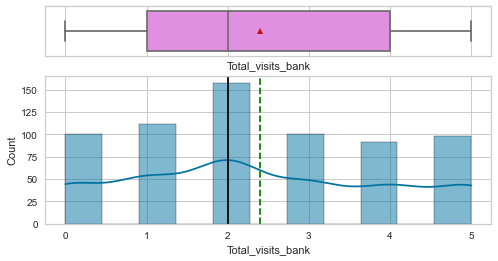

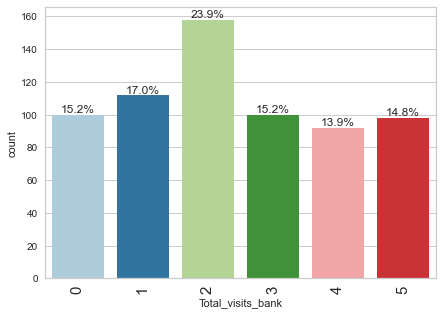

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(subset, "Total_visits_bank", kde=True, figsize=(8, 4))
labeled_barplot(subset, "Total_visits_bank", perc=True)

#### * The highest total here is 2 with 23.9% of the data.

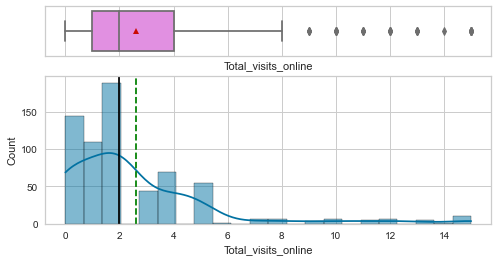

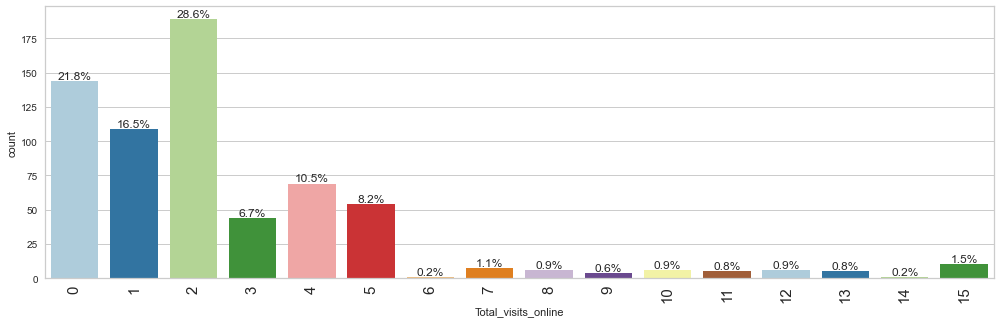

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(subset, "Total_visits_online", kde=True, figsize=(8, 4))
labeled_barplot(subset, "Total_visits_online", perc=True)

#### * The highest value here is 2 with 28.6%, 92.3% of the data falls between 0-5 and 66.9% falls between 0-2. There are quite a few outliers here which can effect the K-means Clustering.

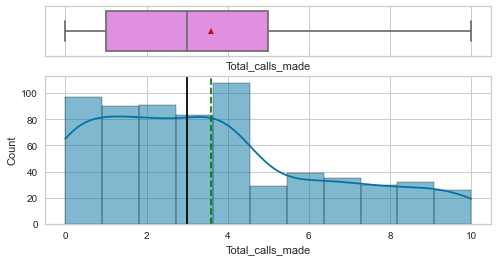

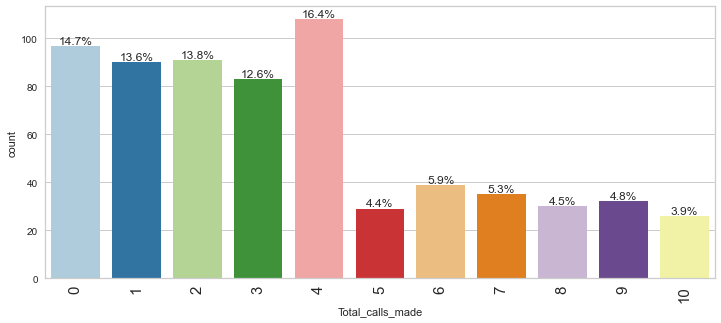

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(subset, "Total_calls_made", kde=True, figsize=(8, 4))
labeled_barplot(subset, "Total_calls_made", perc=True)

#### * 4 is the highest value here with 16.4% of the data. 71.1% of the data falls between 0-4.

## Bivariate/Multivariate

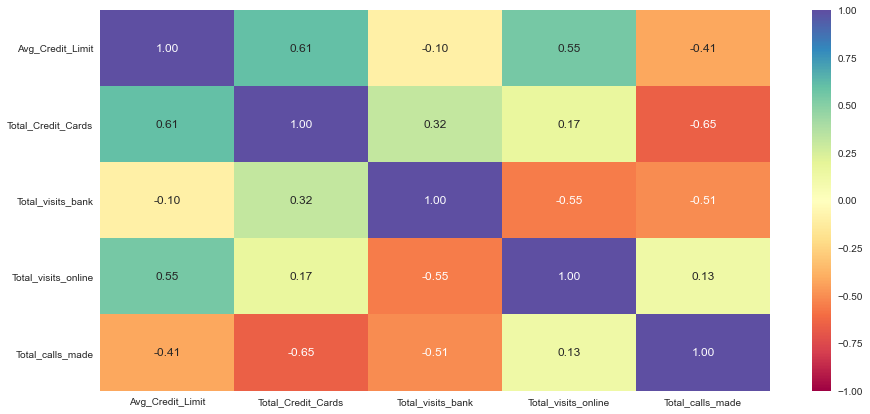

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(subset.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### * Medium Correlation. The highest value is -0.65 between Total_calls_made and Total_Credit_Cards

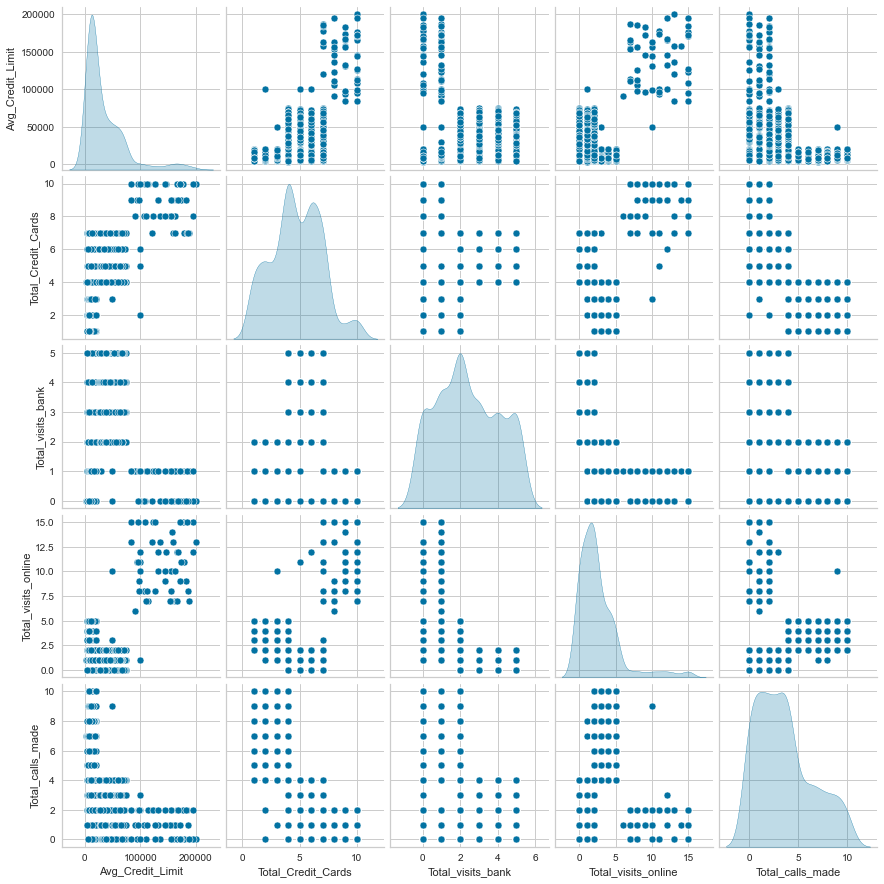

<IPython.core.display.Javascript object>

In [29]:
sns.pairplot(data=subset, diag_kind="kde")
plt.show()

#### * The data shows numerous peaks, I will have to do some analysis to choose the right amount of groups to divide into.

# 5. Clustering Models

In [30]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.sample(10, random_state=2)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
276,-0.520633,-0.325946,1.592670,-0.206600,-1.251537
315,-0.414242,-0.325946,0.366110,-0.547490,-0.203739
198,-0.414242,-1.710864,-0.860451,0.475180,1.193326
268,-0.467438,0.597334,1.592670,-0.888380,-1.251537
203,-0.680221,-1.249225,-1.473731,0.134290,1.193326
340,-0.733417,0.597334,0.366110,-0.547490,-0.902271
183,-0.494036,-1.710864,-0.247170,0.816070,1.542593
239,-0.494036,0.135694,-0.247170,-0.888380,-1.251537
612,3.256266,1.982253,-0.860451,3.884078,-0.902271
37,-0.467438,-1.249225,-1.473731,0.475180,0.844060


<IPython.core.display.Javascript object>

In [31]:
# selecting numerical columns
num_cols = subset.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

## K-means Clustering

### Finding n Clusters using the Elbow Method

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9100391395675648
Number of Clusters: 8 	Average Distortion: 0.8833089128287942
Number of Clusters: 9 	Average Distortion: 0.8680494708751071
Number of Clusters: 10 	Average Distortion: 0.8460060337716955
Number of Clusters: 11 	Average Distortion: 0.8205525933698082
Number of Clusters: 12 	Average Distortion: 0.8011225168166416
Number of Clusters: 13 	Average Distortion: 0.7921948025592384
Number of Clusters: 14 	Average Distortion: 0.768113525000571
Number of Clusters: 15 	Average Distortion: 0.7533092723312402


Text(0.5, 1.0, 'Selecting number of Clusters with the Elbow Method')

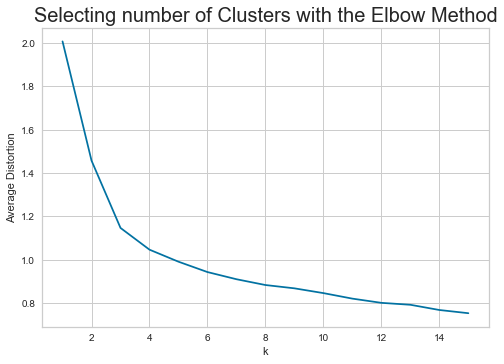

<IPython.core.display.Javascript object>

In [32]:
clusters = range(1, 16)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting number of Clusters with the Elbow Method", fontsize=20)

#### * K-means clustering was done with a range of groups from 1-15. Looking at the elbow, 3 groups seems to have the greatest change in the average distortion. The average distortion value for 3 groups is 1.47.

### Finding n Clusters using the Silhouette Score Method

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.2560368034254374
For n_clusters = 7, silhouette score is 0.24858835370137497
For n_clusters = 8, silhouette score is 0.22686964522123151
For n_clusters = 9, silhouette score is 0.22593573424187466


Text(0.5, 1.0, 'Selecting number of Clusters using the Silhouette Score Method')

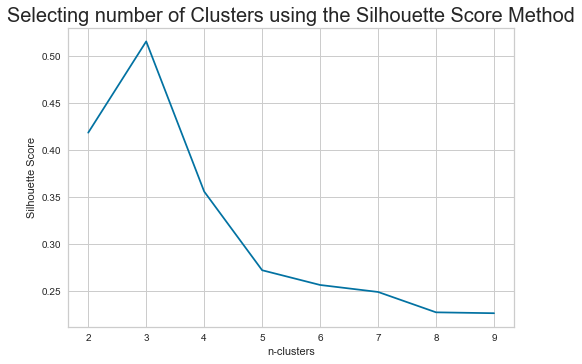

<IPython.core.display.Javascript object>

In [33]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.xlabel("n-clusters")
plt.ylabel("Silhouette Score")
plt.title("Selecting number of Clusters using the Silhouette Score Method", fontsize=20)

#### * The silhouette score graph shows that 3 clusters is optimal. The silhouette score for 3 clusters is 0.516.

### Finding n Clusters using Silhouette Coefficients Method

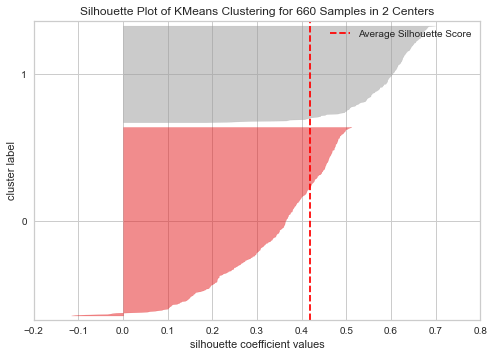

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [34]:
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

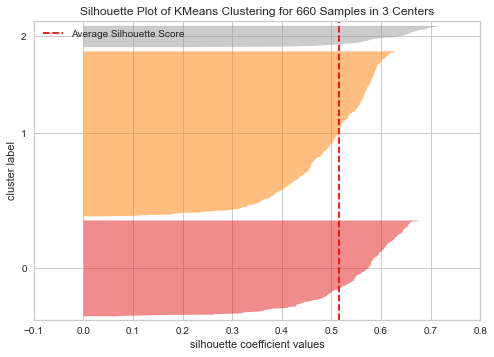

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [35]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

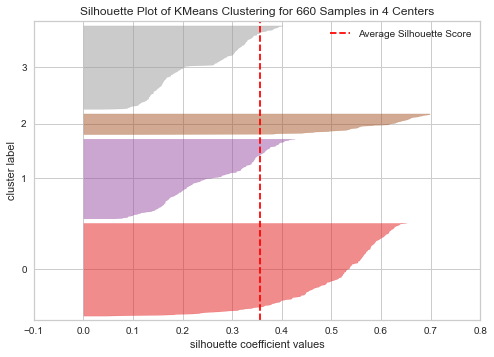

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [36]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

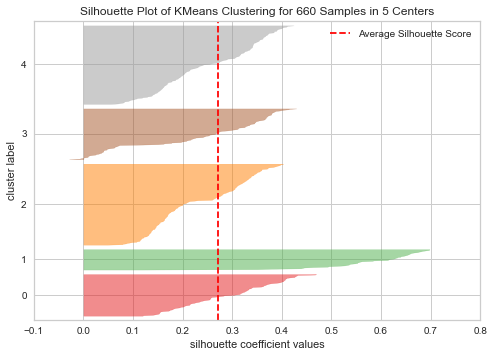

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [37]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

#### * The n clusters with the highest silhouette coefficient values is 3.

In [38]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [39]:
# adding kmeans cluster labels to the original dataframe
subset["K_means_segments"] = km.labels_
subset_scaled_df["K_means_segments"] = km.labels_

<IPython.core.display.Javascript object>

In [40]:
cluster_profile = subset.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [41]:
cluster_profile["count_in_each_segment"] = (
    subset.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [42]:
# displaying cluster profiles
cluster_profile.style.highlight_max(color="yellow", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

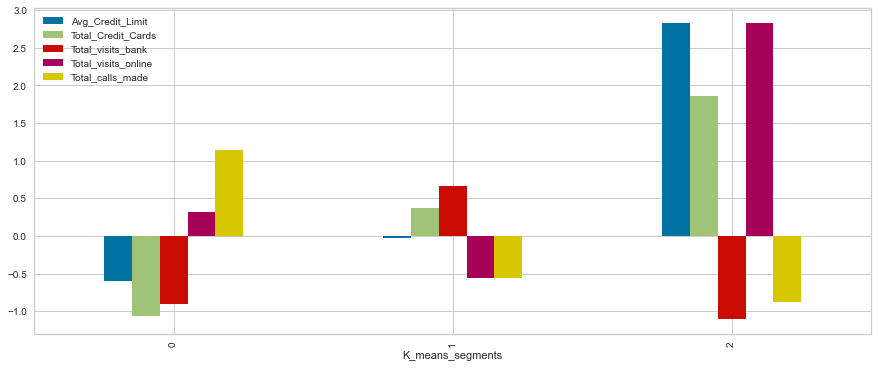

<IPython.core.display.Javascript object>

In [43]:
subset_scaled_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

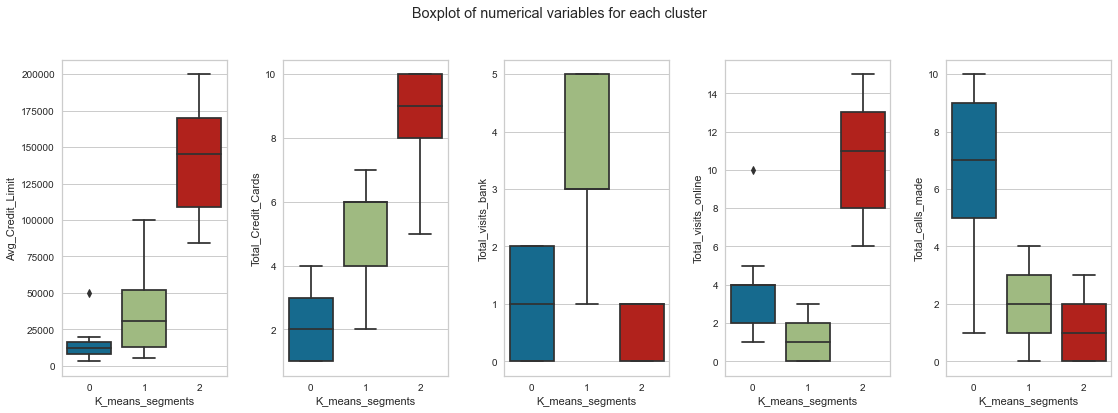

<IPython.core.display.Javascript object>

In [44]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=subset[num_cols[counter]], x=subset["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - Have the lowest average credit limit.
    - Have 2-3 credit cards.
    - Only visit the bank once.
    - Will visit online 3-4 times.
    - Will call 6-7 times (highest of the 3 clusters in this category).
    - Is the second largest group with 224 instances (33.9%).
    - These customers tend to try and do things over the phone so reaching out to them through phone calls will provide the best customer interaction with this group. 
    - Increasing the phone help lines and call ratings will lead to better customer satisfaction with this group.
    - Phone calls with information for new and/or low risk cards would be a good way to increase credit card numbers and credit limit with these customers. 



- **Cluster 1**:
    - Have average credit limits closer to the mean of all customers.
    - Have 5-6 credit cards.
    - Visit the bank 3-4 times (highest of the 3 clusters in this category).
    - Will visit online 0-1 times.
    - Will call 2 times.
    - Is the largest group with 386 instances (58.5%)
    - These customers try to take care of things at the bank. Increasing the interaction time door to door at the bank will provide the best customer interaction with this group.
    - Providing better customer welcomes and tellers with positive feedback will lead to better customer satisfaction with this group.
    - Having in bank information would increase the business oppurtunities with these customers.


- **Cluster 2**:
    - Have the highest average credit limit of all customers. 
    - Have 8-9 credit cards.
    - Visit the bank less than one time.
    - Visit online 8-9 times (highest of the 3 clusters in this category).
    - Will call once. 
    - This is the smallest group with 50 instances (7.6%).
    - These customers tend to deal with the bank online. Increasing the amount of email communication with this group would provide the best customer interaction.
    - Increasing the attractiveness and usability of the website would lead to better customer satisfaction with this group.
    - Providing better credit card rewards would increase business oppurtunities with these customers.

## Hierarchical Clustering

### Calculating the best Cophenetic Correlation

In [45]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8981791108157512.
Cophenetic correlation for Euclidean distance and complete linkage is 0.884420725860894.
Cophenetic correlation for Euclidean distance and average linkage is 0.9102691112621796.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9069999252384202.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8142004375043415.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8565360723350399.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9092248615295281.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9046661477870559.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8650806042953472.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6100510675083297.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8419295288198602.
Cophenetic cor

<IPython.core.display.Javascript object>

In [46]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9102691112621796, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

### Exploring more Linkage Methods using Euclidean Distance

In [47]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8981791108157512.
Cophenetic correlation for complete linkage is 0.884420725860894.
Cophenetic correlation for average linkage is 0.9102691112621796.
Cophenetic correlation for centroid linkage is 0.906845257340526.
Cophenetic correlation for ward linkage is 0.7566252666432097.
Cophenetic correlation for weighted linkage is 0.9069999252384202.


<IPython.core.display.Javascript object>

In [48]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9102691112621796, which is obtained with average linkage.


<IPython.core.display.Javascript object>

#### * The highest cophenetic correlation is  obtained using Euclidean distance and Average Linkage

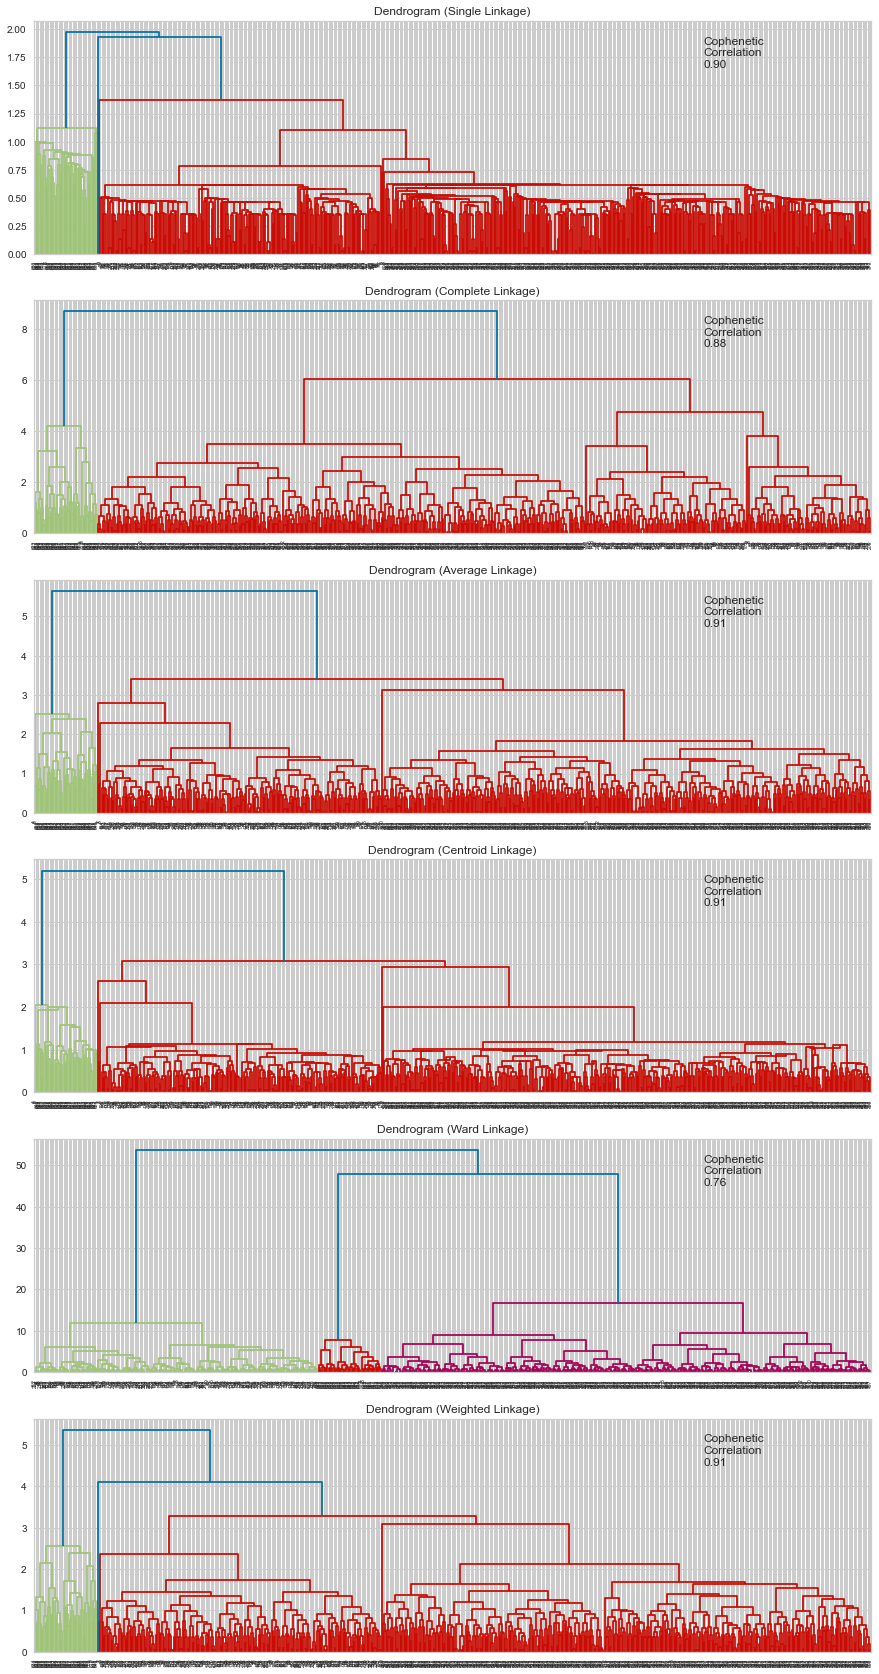

<IPython.core.display.Javascript object>

In [49]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations
- The cophenetic correlation is highest for average, centroid, and weighted linkage methods.
- I will move ahead with average linkage as the dendrograms and cophenetic correlation both pointed to this method.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [50]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [51]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
subset["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling the Euclidean Distance/Average Linkage

In [52]:
cluster_profile = subset.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [53]:
cluster_profile["count_in_each_segments"] = (
    subset.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [54]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the number of credit cards are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 3, the number of credit cards are present:
[100000]

In cluster 0, the number of credit cards are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 2, the number of credit cards are present:
[50000 30000 10000  8000 17000 19000 20000 13000 16000 12000  5000  7000
 11000  9000 18000  6000 15000 14000 73000 49000 67000 61000 75000 48000
 56000 72000 70000 51000 69000 40000 44000 31000 37000 65000 46000 74000
 58000 39000 52000 33000 47000 71000 41000 59000 64000 45000 54000 66000
 27000 43000 36000 25000 57000 26000 38000 35000 34000 28000 63000 29000
 68000 42000 62000 32000 60000 55000]

In cluster 1, the number of credit cards are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 171000 186000 183000 111000 11

<IPython.core.display.Javascript object>

In [55]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the average credit limits are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Total_Credit_Cards"].unique())
    print()

In cluster 3, the average credit limits are present:
[2]

In cluster 0, the average credit limits are present:
[3 2 4 1]

In cluster 2, the average credit limits are present:
[7 5 4 6]

In cluster 1, the average credit limits are present:
[ 6  5  9  8 10  7]



<IPython.core.display.Javascript object>

In [56]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the average credit limits are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print()

In cluster 3, the average credit limits are present:
[1]

In cluster 0, the average credit limits are present:
[0 2 1]

In cluster 2, the average credit limits are present:
[1 2 5 3 4]

In cluster 1, the average credit limits are present:
[0 1]



<IPython.core.display.Javascript object>

In [57]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the average credit limits are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Total_visits_online"].unique())
    print()

In cluster 3, the average credit limits are present:
[1]

In cluster 0, the average credit limits are present:
[10  1  2  5  4  3]

In cluster 2, the average credit limits are present:
[3 1 0 2]

In cluster 1, the average credit limits are present:
[12 11 14  7 10 13 15  6  8  9]



<IPython.core.display.Javascript object>

In [58]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the average credit limits are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Total_calls_made"].unique())
    print()

In cluster 3, the average credit limits are present:
[0]

In cluster 0, the average credit limits are present:
[ 9  8  1  2  7  5  6  4 10]

In cluster 2, the average credit limits are present:
[4 0 2 3 1]

In cluster 1, the average credit limits are present:
[3 2 1 0]



<IPython.core.display.Javascript object>

#### * Seeing only once instance in each category for Cluster 3 leads me to believe that I picked the wrong number from the dendrogram. I will re-run using n-clusters of 3 instead of 4.

In [59]:
HCmodel2 = AgglomerativeClustering(
    n_clusters=3, affinity="euclidean", linkage="average"
)
HCmodel2.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [60]:
subset_scaled_df["HC_Clusters"] = HCmodel2.labels_
subset["HC_Clusters"] = HCmodel2.labels_

<IPython.core.display.Javascript object>

In [61]:
cluster_profile2 = subset.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [62]:
cluster_profile2["count_in_each_segments"] = (
    subset.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

<IPython.core.display.Javascript object>

In [63]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the number of credit cards are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 0, the number of credit cards are present:
[100000  50000  30000  10000   8000  17000  19000  20000  13000  16000
  12000   5000   7000  11000   9000  18000   6000  15000  14000  73000
  49000  67000  61000  75000  48000  56000  72000  70000  51000  69000
  40000  44000  31000  37000  65000  46000  74000  58000  39000  52000
  33000  47000  71000  41000  59000  64000  45000  54000  66000  27000
  43000  36000  25000  57000  26000  38000  35000  34000  28000  63000
  29000  68000  42000  62000  32000  60000  55000]

In cluster 2, the number of credit cards are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 1, the number of credit cards are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 171000 186000 183000

<IPython.core.display.Javascript object>

In [64]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the average credit limits are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Total_Credit_Cards"].unique())
    print()

In cluster 0, the average credit limits are present:
[2 7 5 4 6]

In cluster 2, the average credit limits are present:
[3 2 4 1]

In cluster 1, the average credit limits are present:
[ 6  5  9  8 10  7]



<IPython.core.display.Javascript object>

In [65]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the average credit limits are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print()

In cluster 0, the average credit limits are present:
[1 2 5 3 4]

In cluster 2, the average credit limits are present:
[0 2 1]

In cluster 1, the average credit limits are present:
[0 1]



<IPython.core.display.Javascript object>

In [66]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the average credit limits are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Total_visits_online"].unique())
    print()

In cluster 0, the average credit limits are present:
[1 3 0 2]

In cluster 2, the average credit limits are present:
[10  1  2  5  4  3]

In cluster 1, the average credit limits are present:
[12 11 14  7 10 13 15  6  8  9]



<IPython.core.display.Javascript object>

In [67]:
for cl in subset["HC_Clusters"].unique():
    print("In cluster {}, the average credit limits are present:".format(cl))
    print(subset[subset["HC_Clusters"] == cl]["Total_calls_made"].unique())
    print()

In cluster 0, the average credit limits are present:
[0 4 2 3 1]

In cluster 2, the average credit limits are present:
[ 9  8  1  2  7  5  6  4 10]

In cluster 1, the average credit limits are present:
[3 2 1 0]



<IPython.core.display.Javascript object>

#### * Changing the n-clusters to 3 lead to more diversity in the clusters and elminated the cluster with only one instance.

In [68]:
# lets display cluster profile
cluster_profile2.style.highlight_max(color="pink", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,1,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,0,224


<IPython.core.display.Javascript object>

IndexError: list index out of range

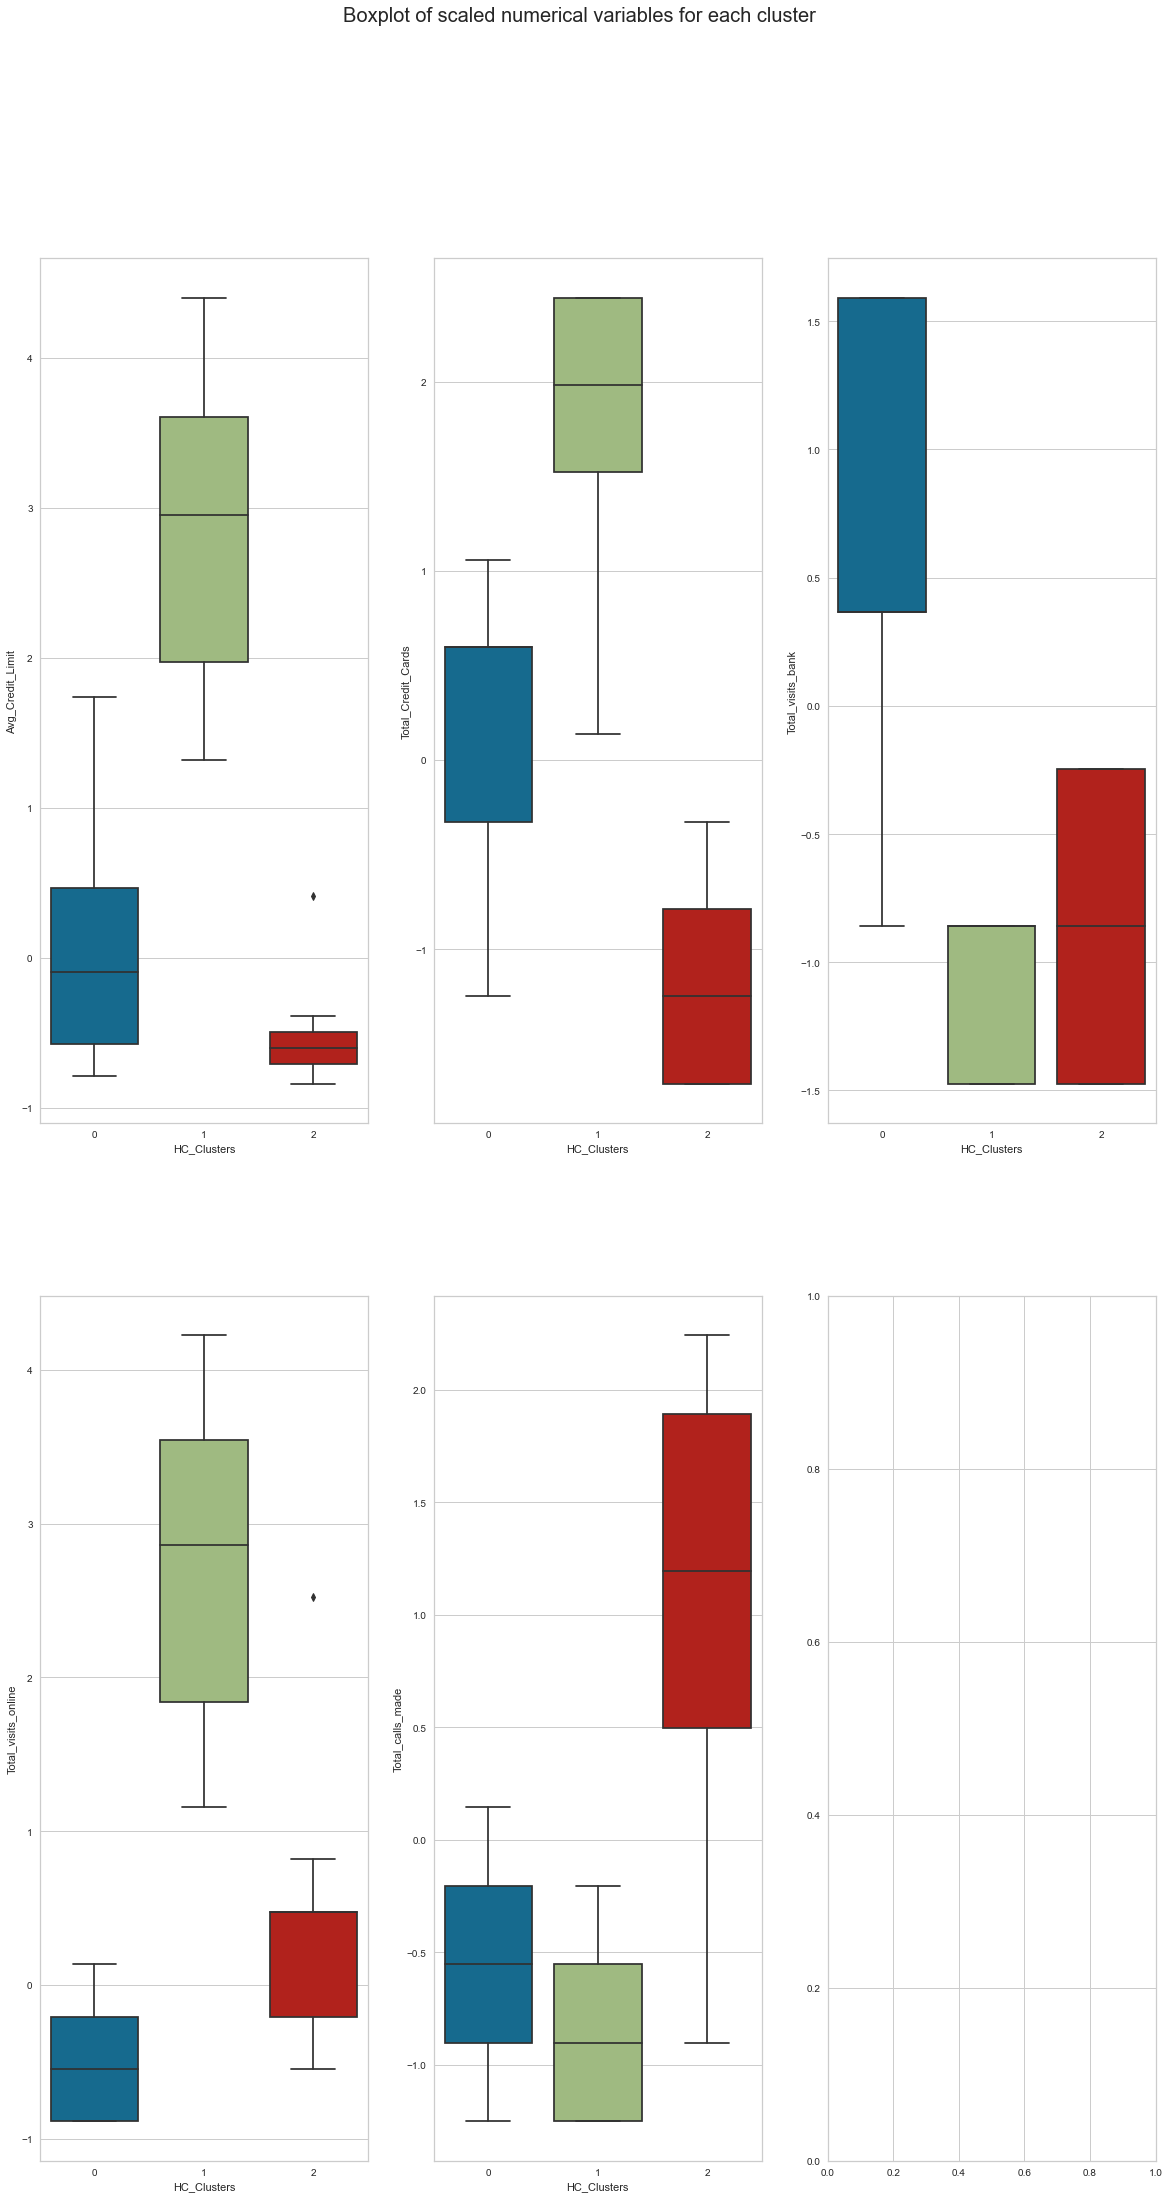

<IPython.core.display.Javascript object>

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

IndexError: list index out of range

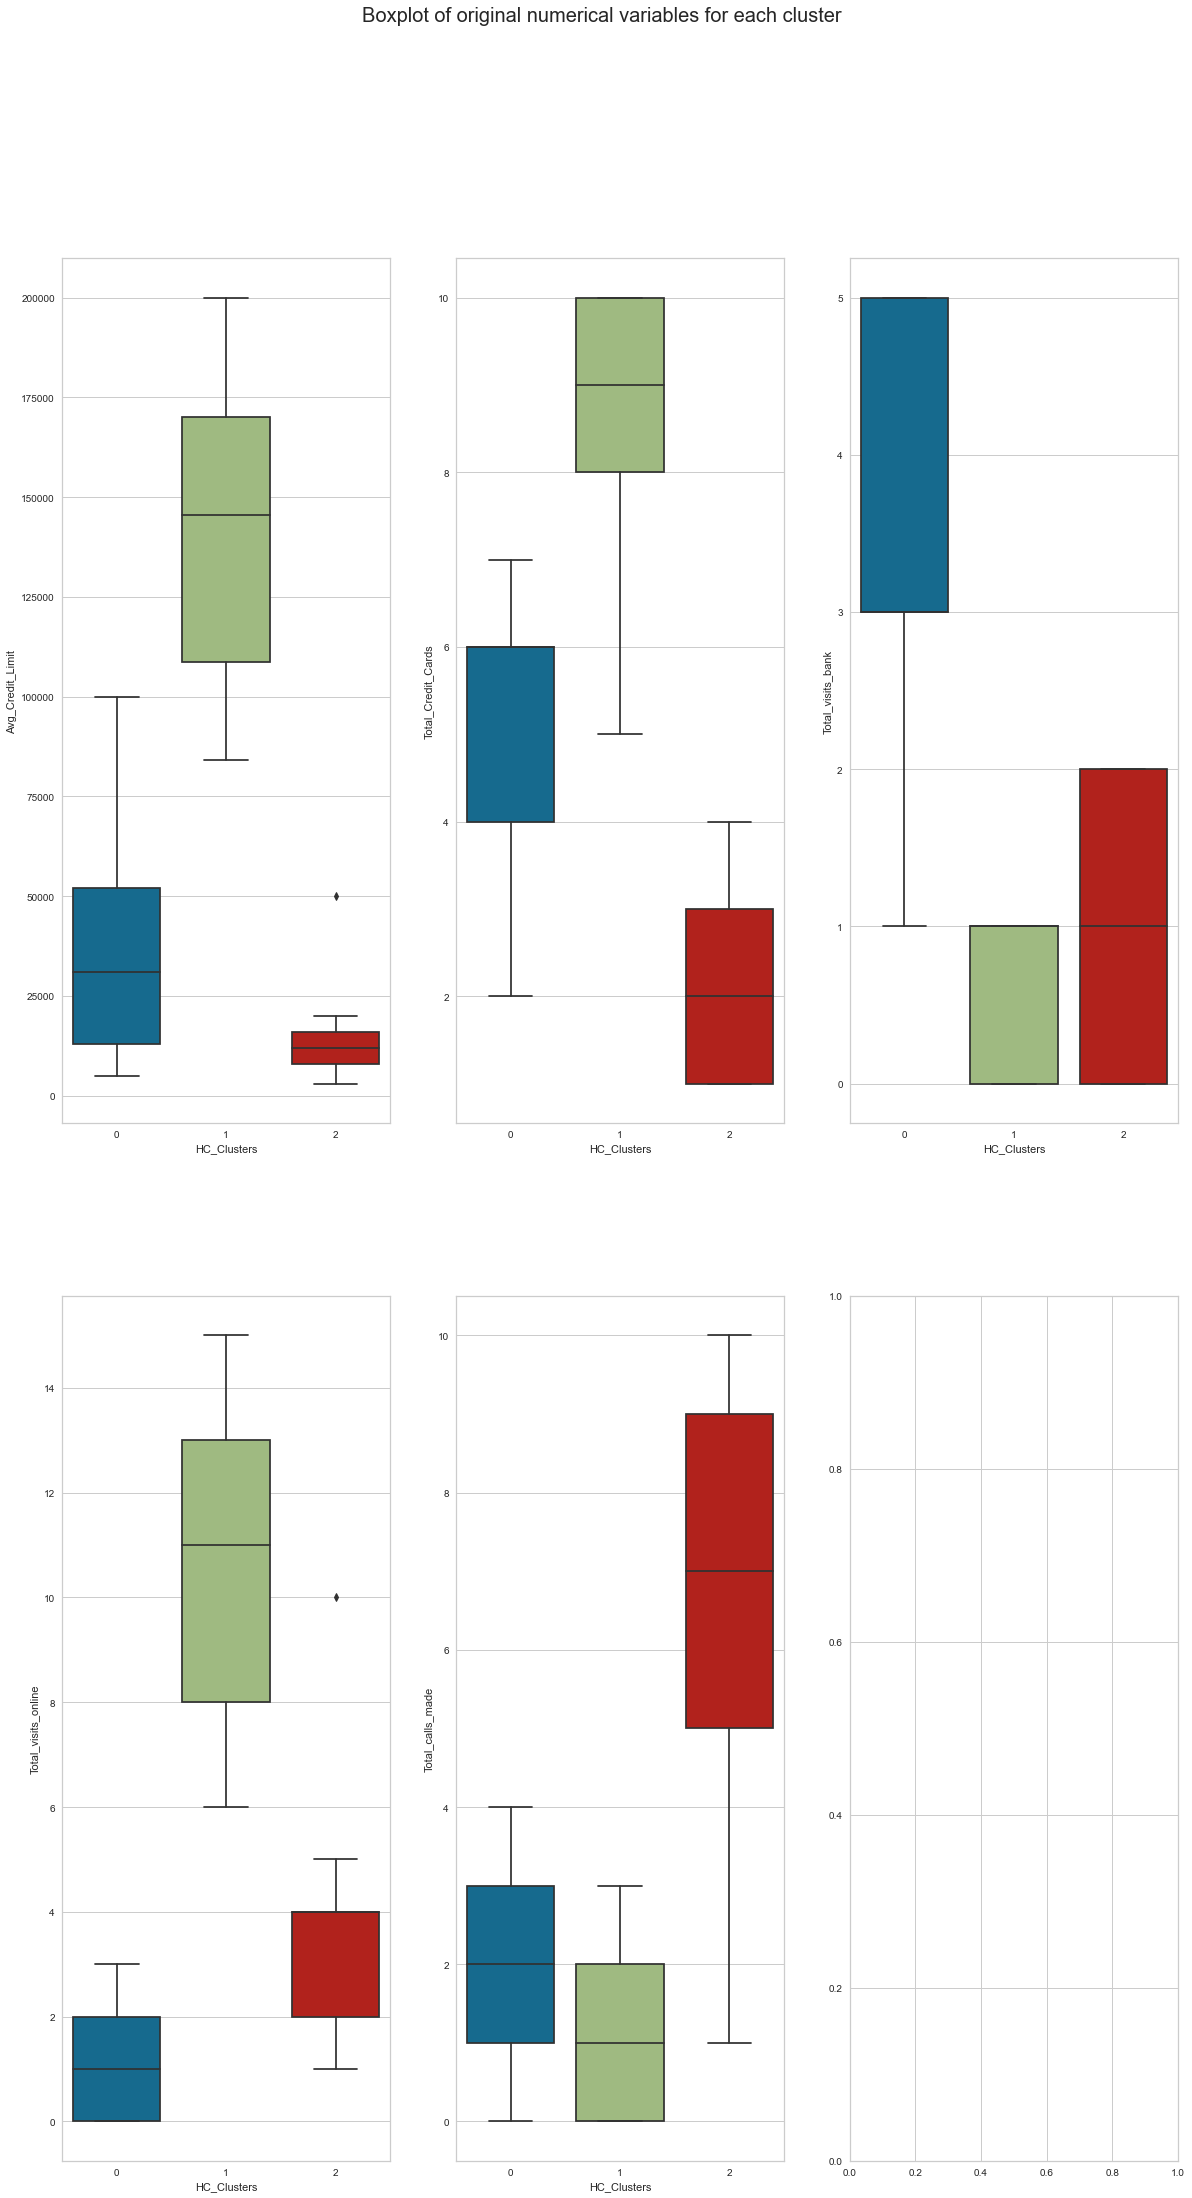

<IPython.core.display.Javascript object>

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0], y=subset[num_cols[counter]], x=subset["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=subset[num_cols[counter]], x=subset["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=subset[num_cols[counter]], x=subset["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## 6. Business Insights and method comparison. 

### The results for KMeans Clustering and Heirarchical Clustering returned the same results. Each method separated the data into three clusters that had the same data points in specific groups. The cluster labels were different but the data contained was the same. 

### To keep from becoming confusing I will not use the labels from each method but call them by Group 0, 1, 2.

### Business Insights

- **Group 0**:
    - Have the lowest average credit limit.
    - Have 2-3 credit cards.
    - Only visit the bank once.
    - Will visit online 3-4 times.
    - Will call 6-7 times (highest of the 3 clusters in this category).
    - Is the second largest group with 224 instances (33.9%).
    - These customers tend to try and do things over the phone so reaching out to them through phone calls will provide the best customer interaction with this group. 
    - Increasing the phone help lines and call ratings will lead to better customer satisfaction with this group.
    - Phone calls with information for new and/or low risk cards would be a good way to increase credit card numbers and credit limit with these customers. 



- **Group 1**:
    - Have average credit limits closer to the mean of all customers.
    - Have 5-6 credit cards.
    - Visit the bank 3-4 times (highest of the 3 clusters in this category).
    - Will visit online 0-1 times.
    - Will call 2 times.
    - Is the largest group with 386 instances (58.5%)
    - These customers try to take care of things at the bank. Increasing the interaction time door to door at the bank will provide the best customer interaction with this group.
    - Providing better customer welcomes and tellers with positive feedback will lead to better customer satisfaction with this group.
    - Having in bank information would increase the business oppurtunities with these customers.


- **Group 2**:
    - Have the highest average credit limit of all customers. 
    - Have 8-9 credit cards.
    - Visit the bank less than one time.
    - Visit online 8-9 times (highest of the 3 clusters in this category).
    - Will call once. 
    - This is the smallest group with 50 instances (7.6%).
    - These customers tend to deal with the bank online. Increasing the amount of email communication with this group would provide the best customer interaction.
    - Increasing the attractiveness and usability of the website would lead to better customer satisfaction with this group.
    - Providing better credit card rewards would increase business oppurtunities with these customers.